In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Data Loading

In [29]:
df = pd.read_csv('data/parkinsons_updrs.data')

In [30]:
X_train_scaled = pd.read_pickle('data/X_train_scaled.pkl')
X_test_scaled = pd.read_pickle('data/X_test_scaled.pkl')
y_train_common = pd.read_pickle('data/y_train_common.pkl')
y_train_motor = pd.read_pickle('data/y_train_motor.pkl')
y_train_total = pd.read_pickle('data/y_train_total.pkl')

In [31]:
X_train_scaled

,sex,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,RPDE,DFA,PPE,age,test_time,Shimmer(dB),HNR
149,0,0.00600,0.000048,0.00302,0.00294,0.00907,0.03866,0.02058,0.02464,0.02778,0.06175,0.019901,0.54100,0.75905,0.19288,0.310345,0.036989,0.156893,0.509150
150,0,0.00810,0.000064,0.00418,0.00457,0.01253,0.04927,0.02715,0.02974,0.03218,0.08144,0.026285,0.48799,0.76679,0.22277,0.310345,0.068611,0.194959,0.426735
151,0,0.00804,0.000062,0.00385,0.00435,0.01155,0.03678,0.02037,0.02216,0.02621,0.06111,0.024588,0.49372,0.78209,0.29585,0.310345,0.100270,0.153292,0.447182
152,0,0.00680,0.000049,0.00350,0.00319,0.01050,0.05083,0.02733,0.03268,0.03511,0.08198,0.034226,0.54635,0.73637,0.21570,0.310345,0.132287,0.234053,0.427358
153,0,0.00375,0.000028,0.00201,0.00209,0.00603,0.03091,0.01684,0.01845,0.02269,0.05052,0.011958,0.44009,0.73302,0.18964,0.310345,0.164173,0.125000,0.503050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,0,0.00406,0.000031,0.00167,0.00168,0.00500,0.01896,0.00973,0.01133,0.01549,0.02920,0.025137,0.64215,0.55314,0.21367,0.413793,0.669173,0.068930,0.569349
5871,0,0.00297,0.000025,0.00119,0.00147,0.00358,0.02315,0.01052,0.01277,0.01904,0.03157,0.011927,0.52598,0.56518,0.12621,0.413793,0.701255,0.097222,0.587267
5872,0,0.00349,0.000025,0.00152,0.00187,0.00456,0.02499,0.01371,0.01456,0.01877,0.04112,0.017701,0.47792,0.57888,0.14157,0.413793,0.733018,0.112140,0.662785
5873,0,0.00281,0.000020,0.00128,0.00151,0.00383,0.01484,0.00693,0.00870,0.01307,0.02078,0.007984,0.56865,0.56327,0.14204,0.413793,0.764462,0.054012,0.640500


In [32]:
# sns.set(style="whitegrid")
# sns.pairplot(df, diag_kind="kde", markers='o', hue='subject#', palette='husl')
# plt.savefig('pairplot.png')

In [33]:
# df.drop(columns=['subject#'], inplace=True)

## Box plot of the features (for outliers)

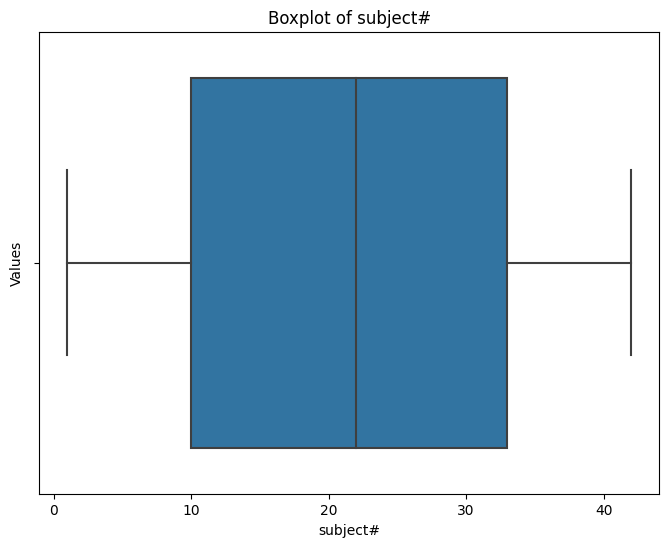

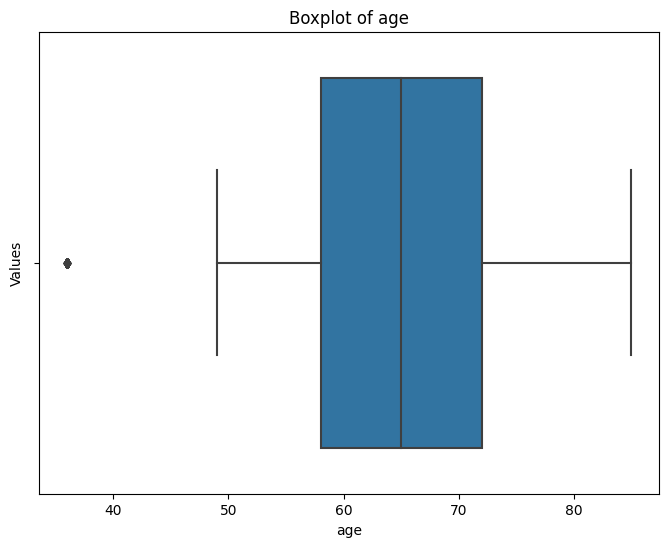

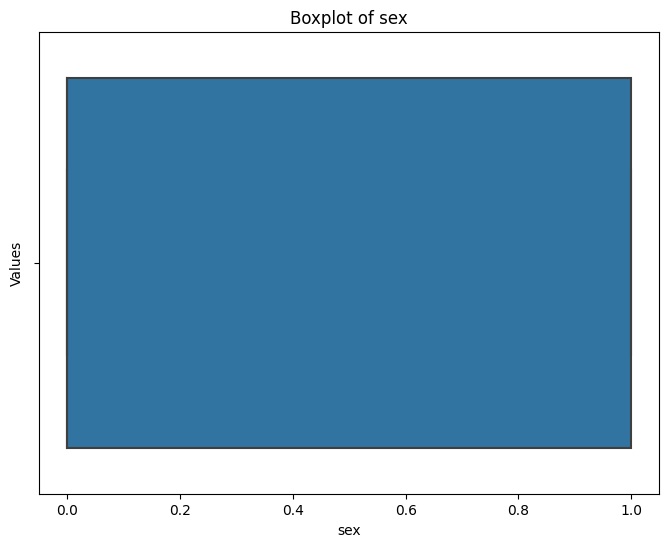

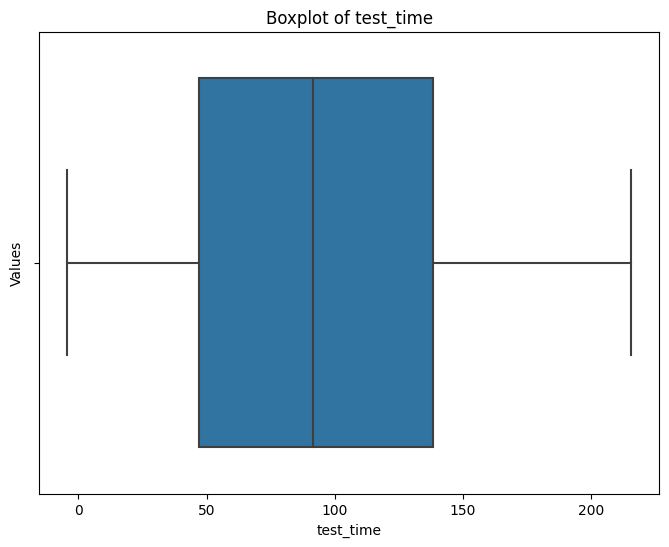

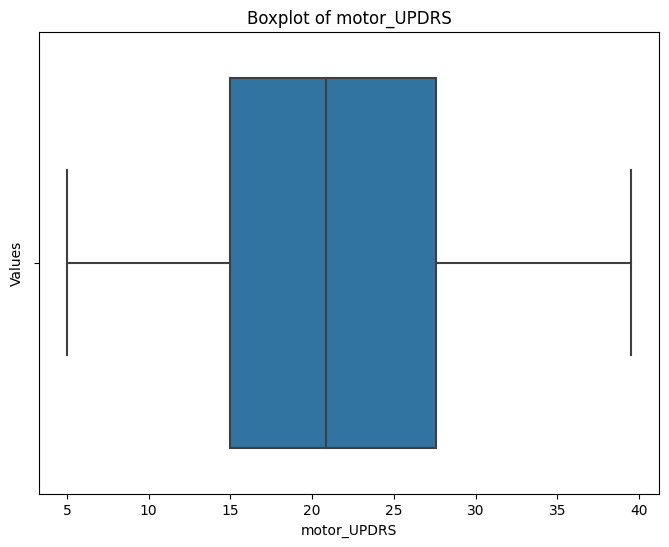

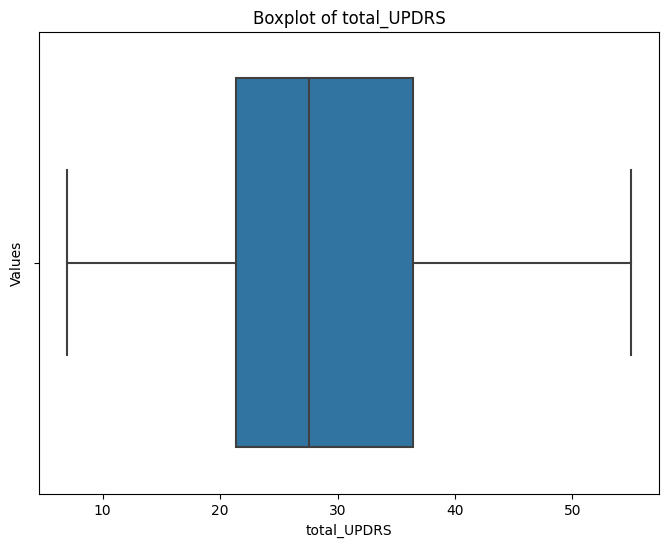

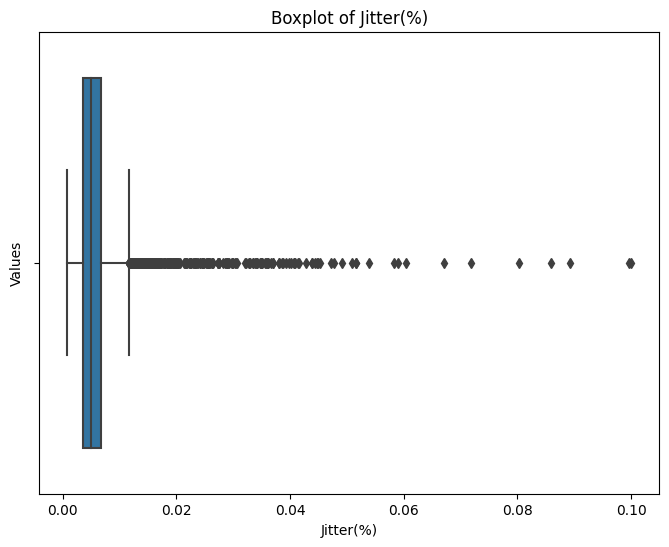

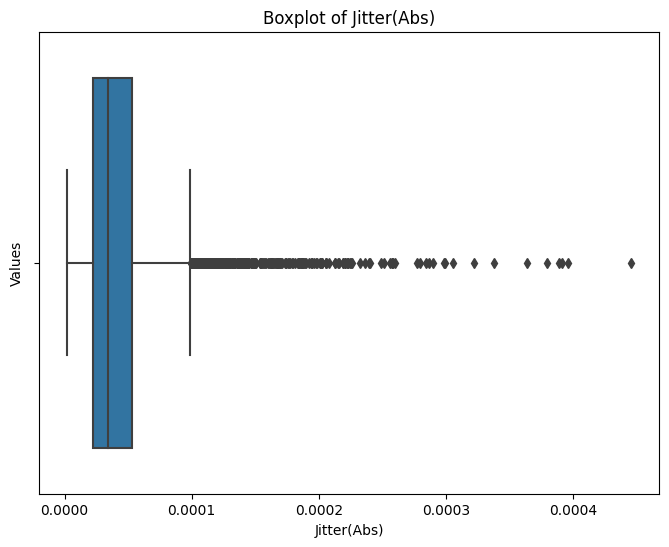

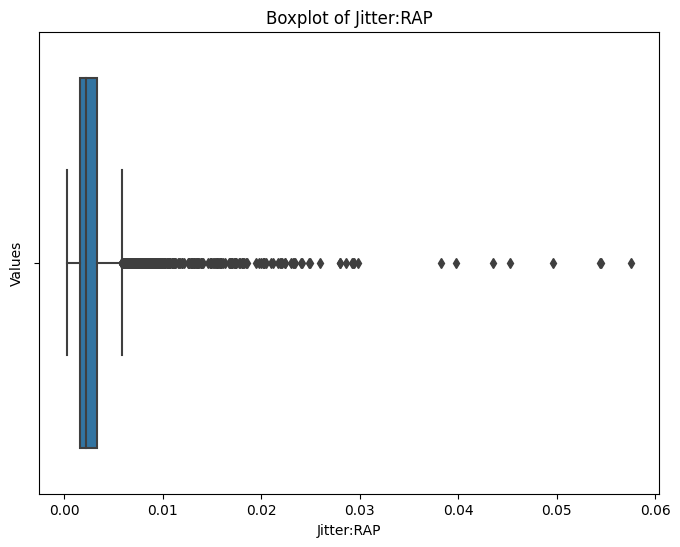

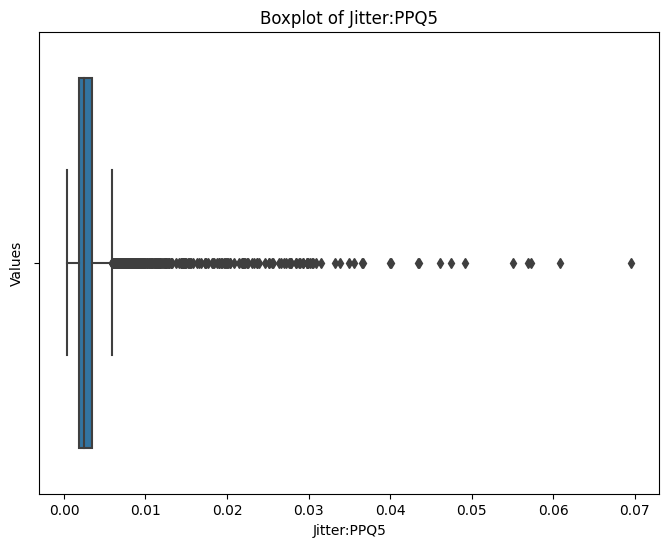

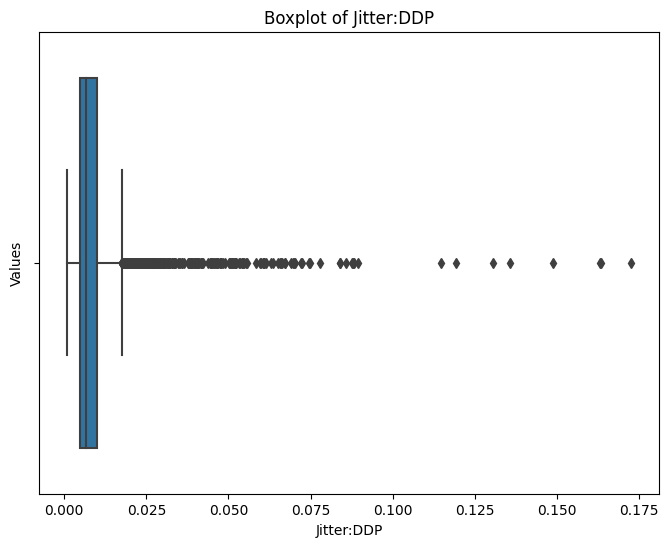

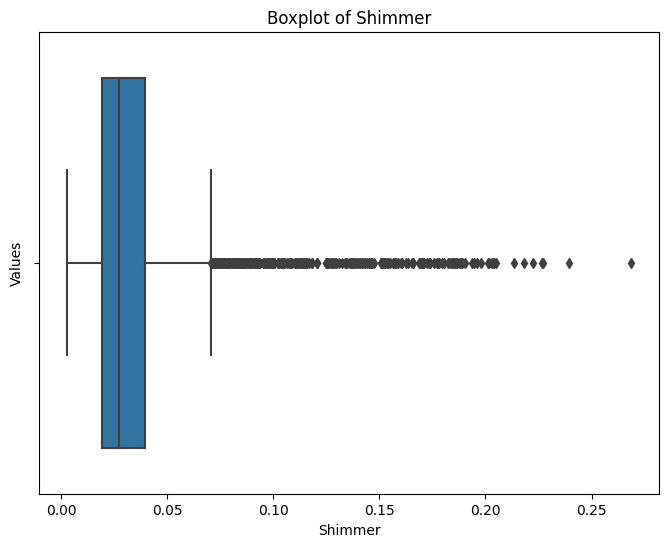

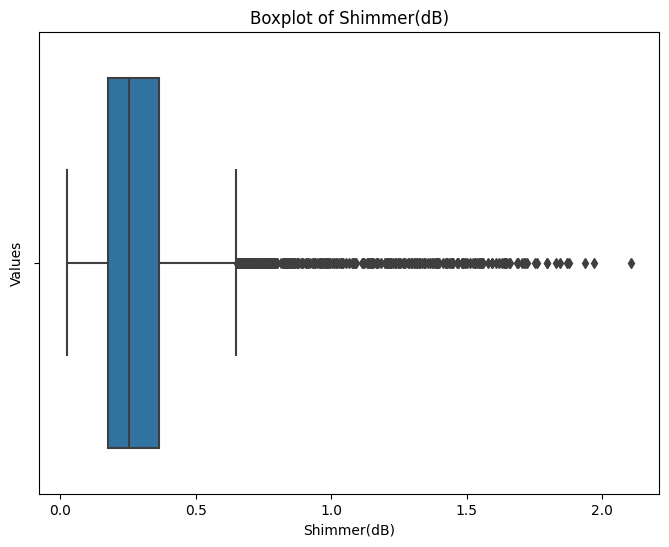

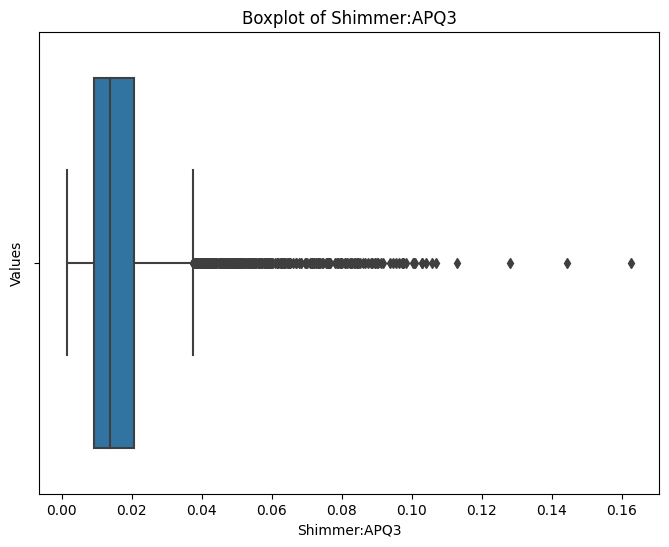

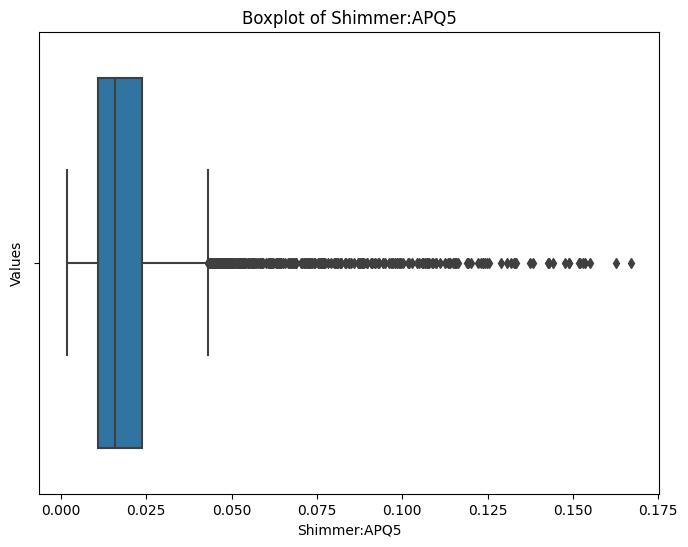

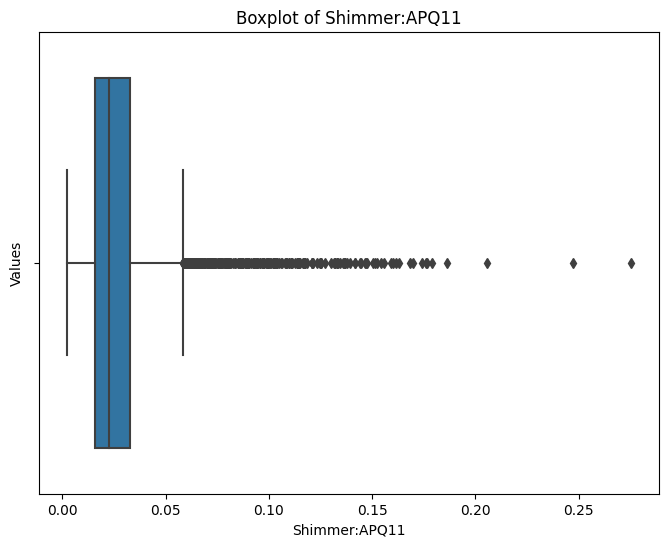

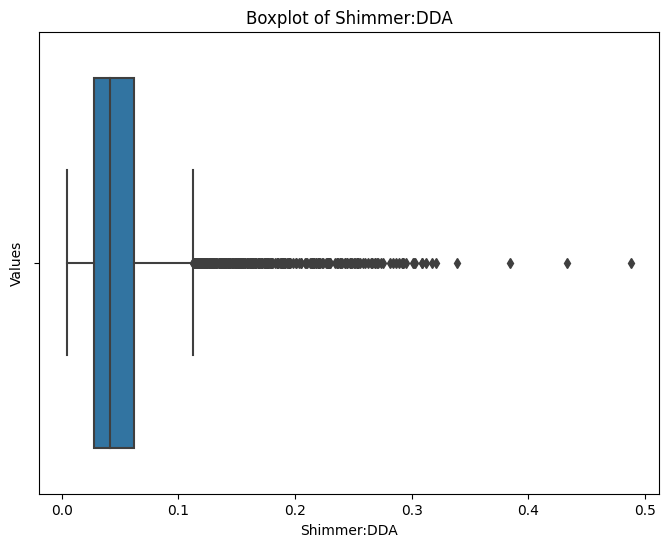

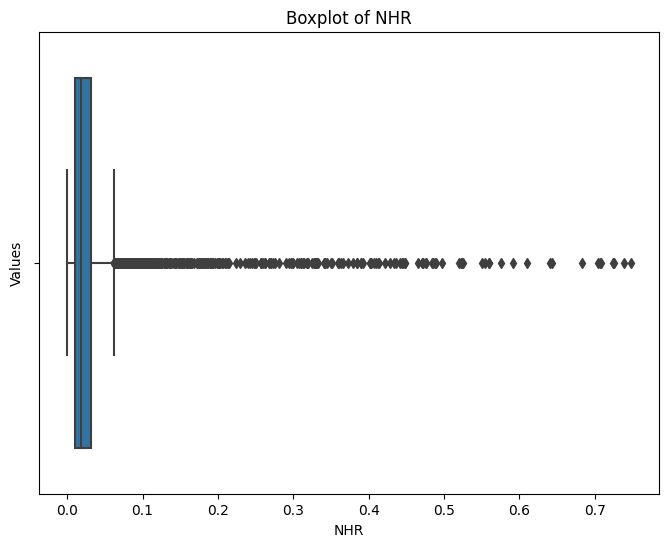

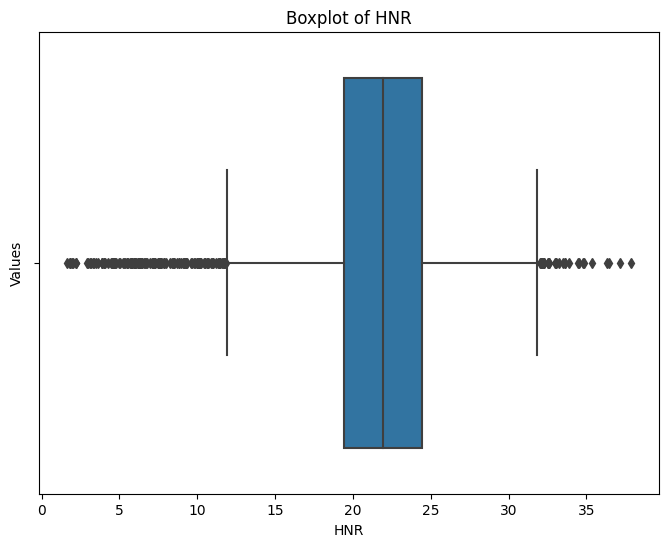

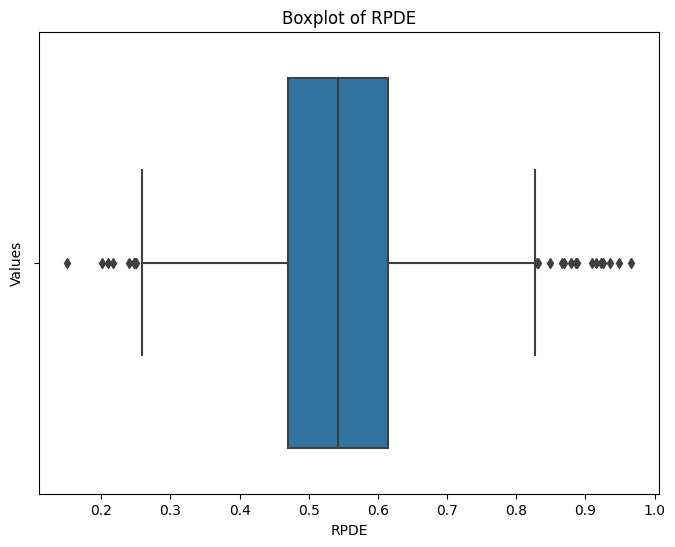

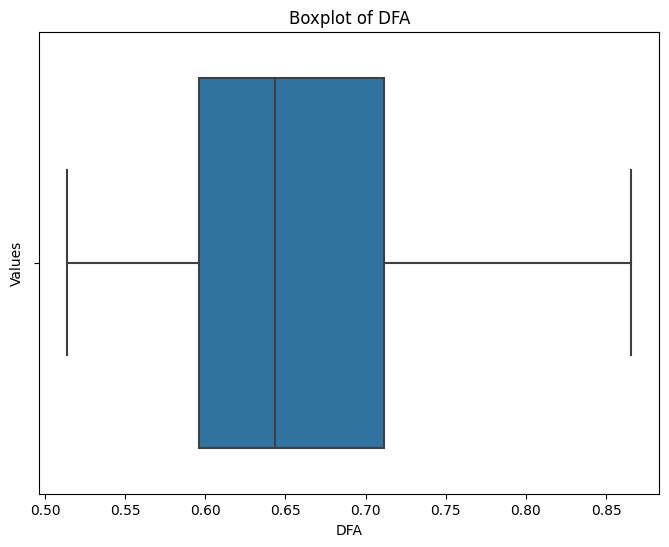

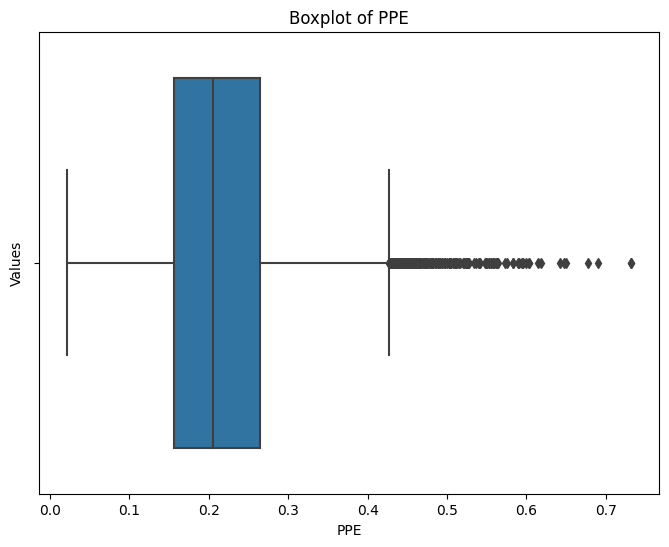

In [34]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

for feature in numeric_columns:
    plt.figure(figsize=(8, 6)) 
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Values')
    plt.show()


## PCA

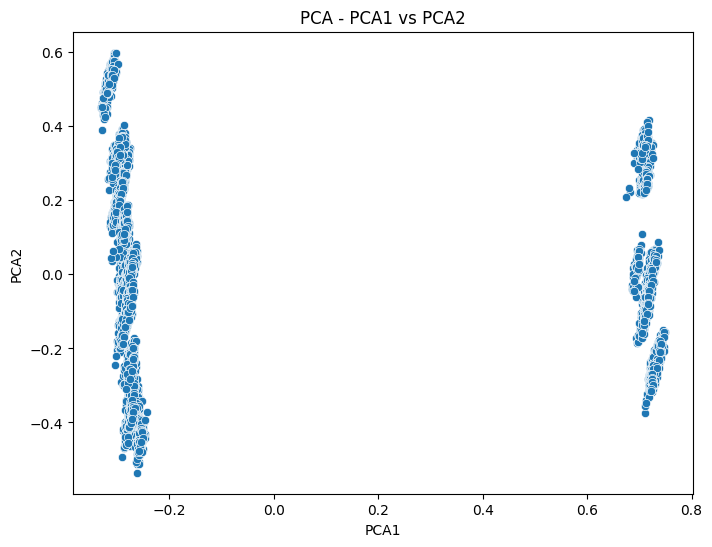

In [36]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled) 
X_test_pca = pca.transform(X_test_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1])
plt.title('PCA - PCA1 vs PCA2')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

Not Good!

let's cluster the pca

/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


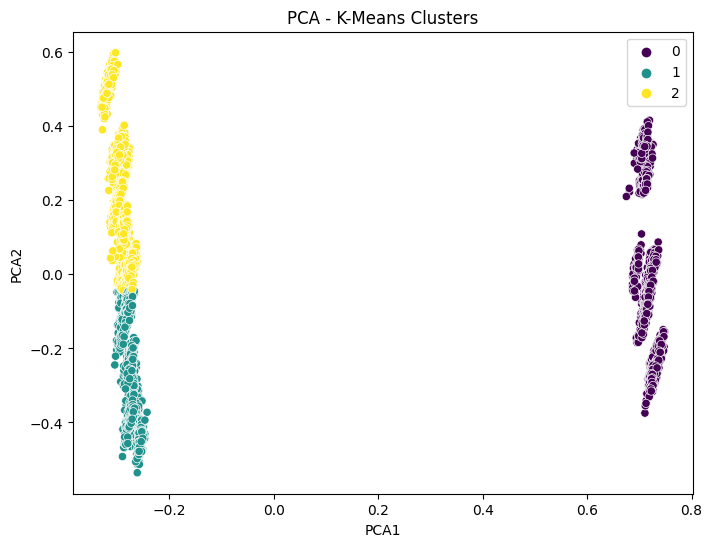

In [37]:
kmeans = KMeans(n_clusters=3, random_state=42) 
clusters = kmeans.fit_predict(X_train_pca) 

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=clusters, palette='viridis', legend='full')
plt.title('PCA - K-Means Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

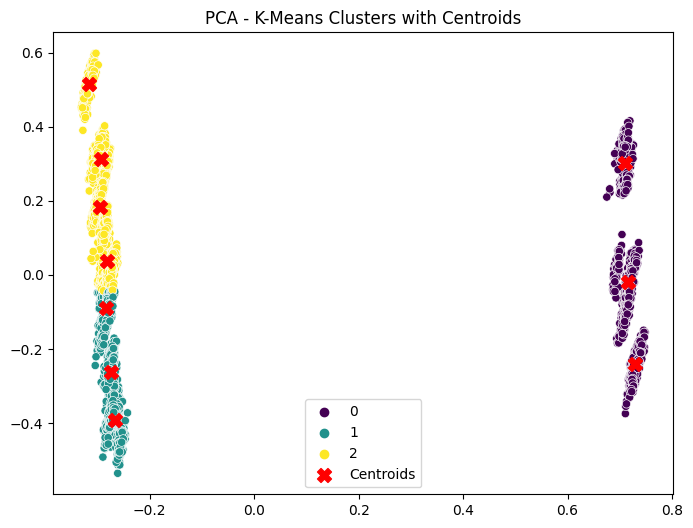

In [47]:
cluster_centroids = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=clusters, palette='viridis', legend='full')

plt.scatter(cluster_centroids[:, 0], cluster_centroids[:, 1], marker='X', color='red', s=100, label='Centroids')
plt.title('PCA - K-Means Clusters with Centroids')
plt.legend()
plt.show()

In [44]:
silhouette_avg = silhouette_score(X_train_pca, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.659879169842799


Not bad

**Agglomerative Clustering might be good for feature selection**

## TSNE

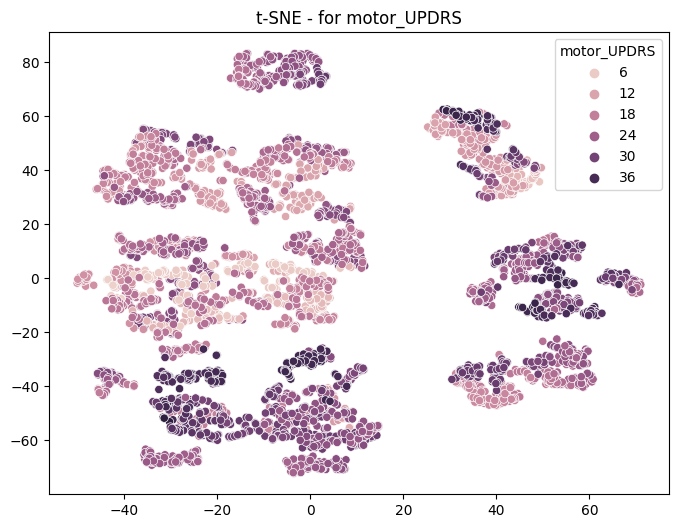

In [46]:
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled) 

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], hue=y_train_motor)
plt.title('t-SNE - for motor_UPDRS')
plt.show()

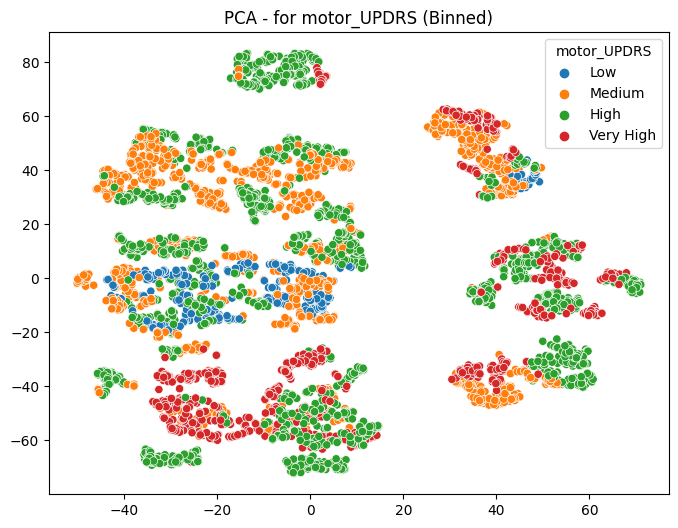

In [39]:
bins = [0, 10, 20, 30, 40] 
labels = ['Low', 'Medium', 'High', 'Very High']
y_train_motor_binned = pd.cut(y_train_motor, bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], hue=y_train_motor_binned)
plt.title('PCA - for motor_UPDRS (Binned)')
plt.show()


Check for other target!